In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook #gives interactivity with each of the plots, need to turn off for each figure

# Introduction to Statistics:
An Aperitif for DSFP Session 4
========

#### Version 0.1

***
By AA Miller 2017 Sep 14

An [Introduction to Statistics](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session1/Day2/IntroStat.pdf) was covered during Session 1 of the DSFP. Typically, this initial lecture is used as a means of providing a brief overview of the Session 1 material, but that does not make sense in the context of Session 4, as half of you have not seen this lecture.

Instead, today we will focus on a relatively simple problem, while highlighting several challenges for the standard astronomical workflow, as a way of setting up the various lectures that will happen over the course of this week. 

A lot of the lessons in this lecture are inspired by the paper [Data Analysis Recipes: Fitting a Model to Data](https://arxiv.org/abs/1008.4686) by Hogg, Bovy, & Lang. [This paper has been mentioned previously in the DSFP, though today we will only be able to scratch the surface of its content.]

In some sense - the goal right now is to make you really nervous about the work that you've previously done. 

(Though this lecture should not be met with too much consternation, as you will have a toolkit to deal with all the issues that we raise by the end of the week)

## Problem 1) Data

At the core of everything we hope to accomplish with the DSFP stands a single common connection: data.

There are many things we (may) want to do with these data: reduce them, visualize them, model them, develop predictions from them, use them to infer fundamental properties of the universe (!).

Before we dive into that really fun stuff, we should start with some basics:

**Problem 1a**

What is data?

*Take a few min to discuss this with your partner*

**Solution 1a**
 Data is data!
*write your answer here*

**Problem 1b**

Below, I provide some data (in the form of `numpy` arrays). As good data scientists, what is the first thing you should do with this data?

Feel free to create a new cell if necessary.

In [60]:
y = np.array([203, 58, 210, 202, 198, 158, 
              165, 201, 157, 131, 166, 160, 
              186, 125, 218, 146])
x = np.array([495, 173, 479, 504, 510, 416, 
              393, 442, 317, 311, 400, 337, 
              423, 334, 533, 344])

**Problem 1c**

[You may have already done this] Now that we understand the origin of the data, make a scatter plot showing their distribution.

<IPython.core.display.Javascript object>


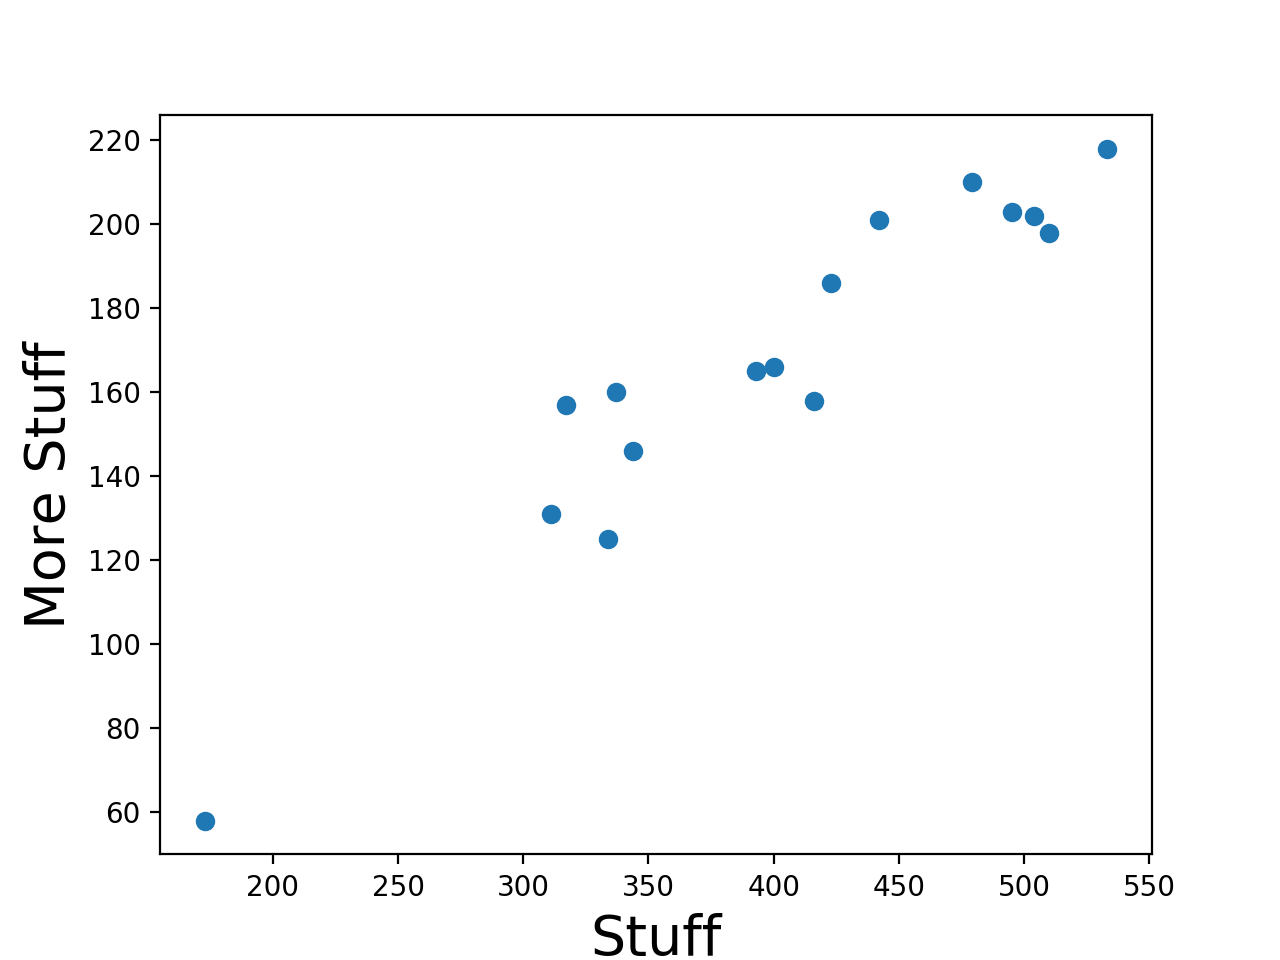

In [6]:
plt.scatter(x,y) # complete
plt.xlabel("Stuff", fontsize=20)
plt.ylabel("More Stuff", fontsize=20)

## Probelm 2) Fitting a Line to Data

There is a very good chance, though I am not specifically assuming anything, that upon making the previous plot you had a thought along the lines of "these points fall on a line" or "these data represent a linear relationship."  

**Problem 2a** 

Is the assumption of linearity valid for the above data?

Is it convenient?

*Take a few min to discuss this with your partner*

**Solution 2a**

Yes, but it may be incorrect. It is convient but it maybe wrong.

Let us proceed with convenience and assume the data represent a linear relationship. In that case, in order to make predictions for future observations, we need to fit a line to the data. 

The "standard" proceedure for doing so is [least-squares fitting](https://en.wikipedia.org/wiki/Least_squares). In brief, least-squares minimizes the sum of the squared value of the residuals between the data and the fitting function.

I've often joked that all you need to be a good data scientist is [google](https://www.google.com) and [stack overflow](https://stackoverflow.com). Via those two tools, we can quickly deduce that the easiest way to perform a linear least-squares fit to the above data is with [`np.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), which performs a least-squares polynomial fit to two `numpy` arrays.

**Problem 2b**

Use `np.polyfit()` to fit a line to the data. Overplot the best-fit line on the data.

[ 0.40761899  4.42216456]


<IPython.core.display.Javascript object>


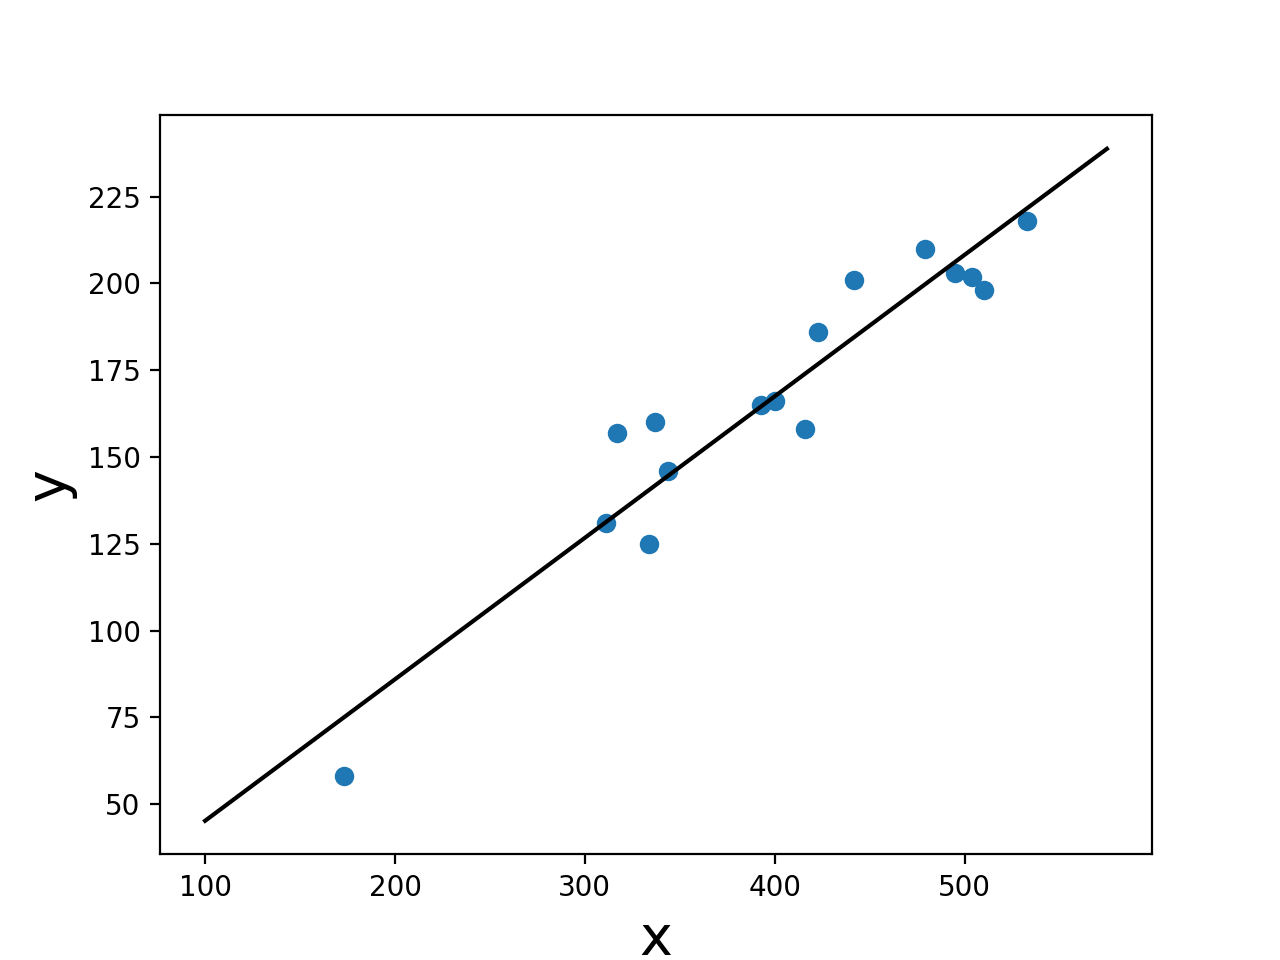

In [23]:
p = np.polyfit(x, y, 1) 
fit = np.poly1d(p)
xp = np.linspace(100, 575, 100)
print(p)

plt.scatter(x, y)
plt.plot(xp, fit(xp), '-',color='k') 
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

There is a very good chance, though, again, I am not specifically assuming anything, that for the previous plots that you plotted `x` along the abscissa and `y` along the ordinate. 

[Honestly, there's no one to blame if this is the case, this has essentially been drilled into all of us from the moment we started making plots. In fact, in `matplotlib` we cannot change the name of the abscissa label without adjusting the `xlabel`.]

This leads us to an important question, however. What if `y` does not depend on `x` and instead `x` depends on `y`? Does that in any way change the results for the fit?

**Problem 2c**

Perform a linear least-squares fit to `x` vs. `y` (or if you already fit this, then reverse the axes). As above, plot the data and the best-fit model.

To test if the relation is the same between the two fits, compare the predicted `y` value for both models corresponding to `x = 300`.

[  2.21665602  28.84345193]


<IPython.core.display.Javascript object>


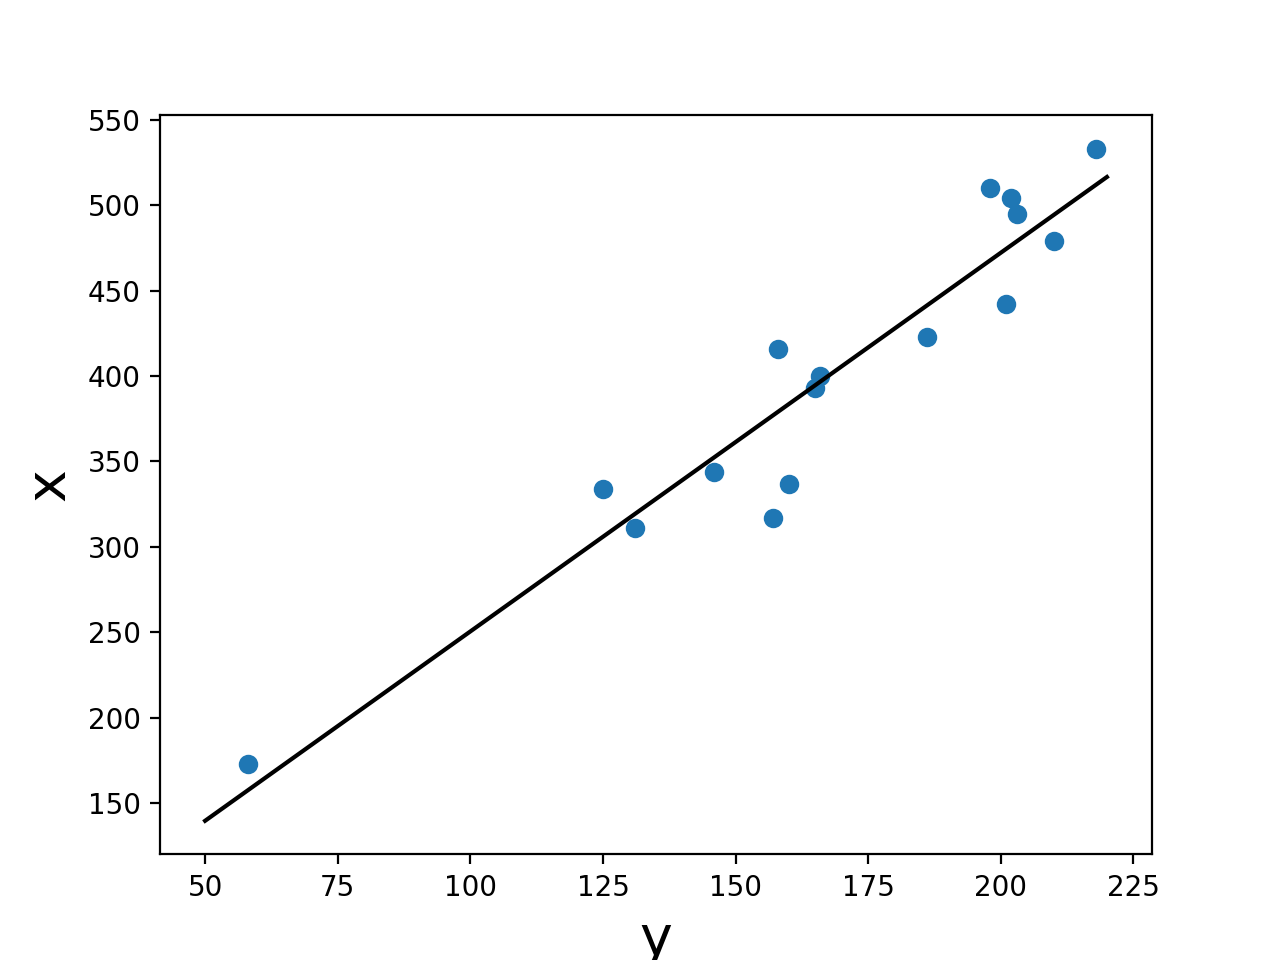

For y vs. x, then x=50 would predict y=24.80
For x vs. y, then x=50 would predict y=9.54


In [62]:
p_yx = np.polyfit(y, x, 1)
fit_yx = np.poly1d(p_yx)
xp2 = np.linspace(50, 220, 100)
print(p_yx)

plt.scatter(y, x)
plt.plot(xp2, fit_yx(xp2), '-',color='k') 
plt.xlabel('y', fontsize=20)
plt.ylabel('x', fontsize=20)


print("For y vs. x, then x=50 would predict y={:.2f}".format(fit(50))) #Try this again later
print("For x vs. y, then x=50 would predict y={:.2f}".format((50 - p_yx[1])/p_yx[0])) #Hmm my numbers don't match at all!!

So we have now uncovered one of the peculiariaties of least-squares. Fitting `y` vs. `x` is *not* the same as fitting `x` vs. `y`.

There are a couple essential assumptions that go into standard least-squares fitting:

1. There is one dimension along which the data have negligible uncertainties
2. Along the other dimension **all** of the uncertainties can be described via Gaussians of known variance

These two conditions are *rarely* met for astronomical data. While condition 1 can be satisfied (e.g., time series data where there is essentially no uncertainty on the time of the observations), I contend that condition 2 is rarely, if ever, satisfied.

Speaking of uncertainties(1), we have not utilized any thus far. [I hope this has raised some warning bells.]

We will now re-organize our data to match what is originally in Hogg, Bovy, & Lang (previously `x` and `y` were swapped).

(1) There is an amazing footnote in Hogg, Bovy, & Lang about "errors" vs. "uncertainties" - I suggest everyone read this.

**Problem 2d**

Re-plot the data including the uncertatines.

<IPython.core.display.Javascript object>


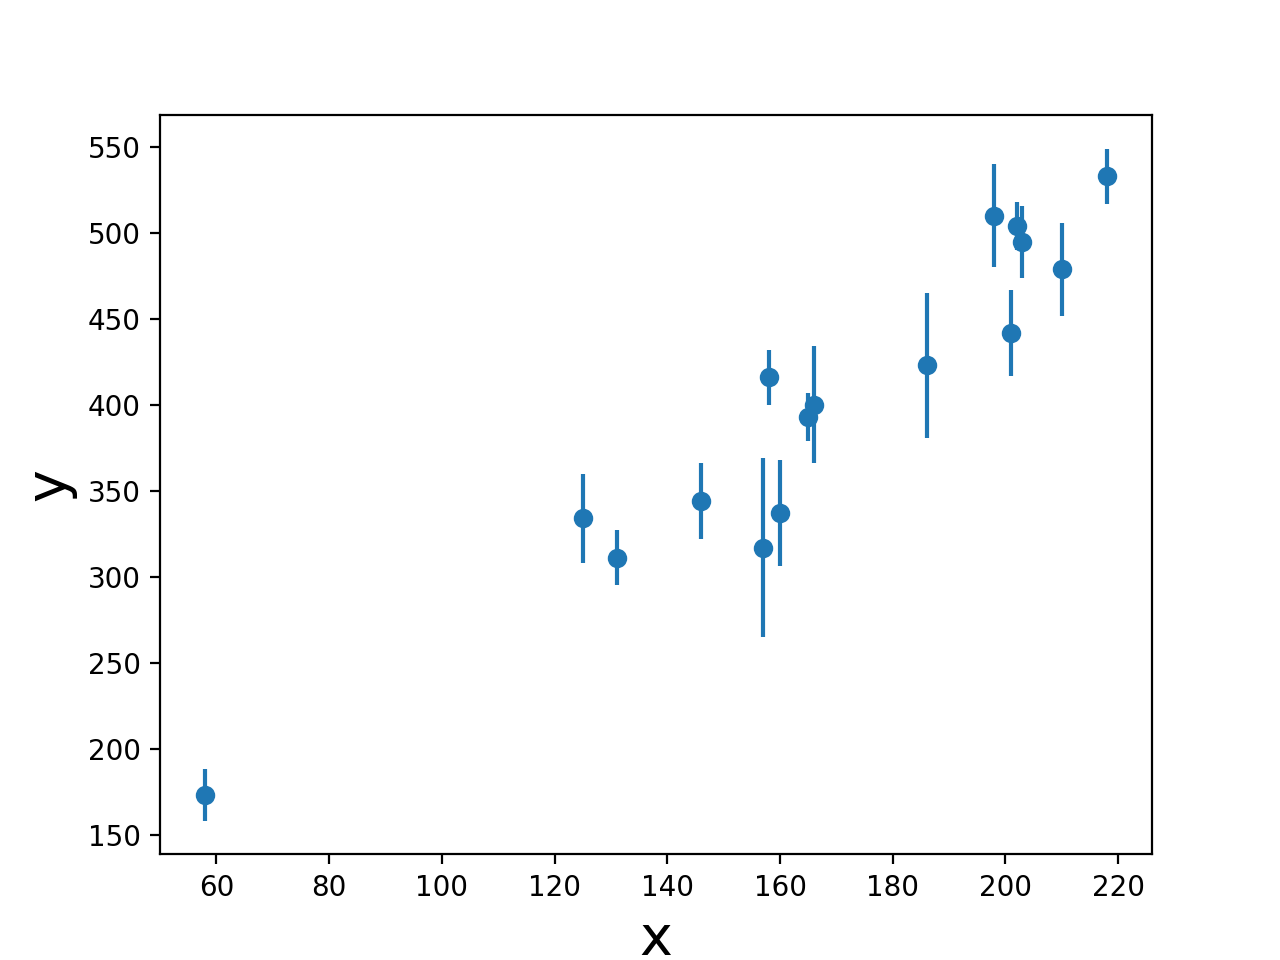

In [63]:
x = np.array([203, 58, 210, 202, 198, 158, 
              165, 201, 157, 131, 166, 160, 
              186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 
              393, 442, 317, 311, 400, 337, 
              423, 334, 533, 344])
sigma_y = np.array([21, 15, 27, 14, 30, 16, 
                    14, 25, 52, 16, 34, 31, 
                    42, 26, 16, 22])

plt.errorbar(x, y, yerr=sigma_y, fmt='o')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

We are now assuming that `x` has negligible uncertainties and that `y` has uncertainties that can be perfectly described by Gaussians of known variance.

A portion of the appeal of least-squares is that it provides a deterministic method for determining the best fit. To understand that we now need to do a little linear algebra.

We can arrange the data in the following matricies:

$$ \mathbf{Y} = \left[ {\begin{array}{c}
            y_1 \\
            y_2 \\
            \dots \\
            y_N
            \end{array}
           }
            \right] , $$

$$ \mathbf{A} = \left[ {\begin{array}{cc}
            1 & x_1 \\
            1 & x_2 \\
            \dots & \dots \\
            1 & x_N
            \end{array}
           }
           \right] ,
           $$
           
$$ \mathbf{C} = \left[ {\begin{array}{cccc}
            \sigma_{y_1}^2 & 0 & \dots & 0 \\
            0 & \sigma_{y_2}^2 & \dots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0 & 0 & \dots & \sigma_{y_1}^2 \\
            \end{array}
           }
           \right] ,
           $$
           
where $\mathbf{Y}$ is a vector, and $\mathbf{C}$ is the covariance matrix. 

Ultimately, we need to solve the equation

$$\mathbf{Y} = \mathbf{A}\mathbf{X}.$$

I am skipping the derivation, but the solution to this equations is:

$$ \left[ {\begin{array}{c}
            b \\
            m \\
            \end{array}
           }
            \right] = \mathbf{X} = \left[ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}\right]^{-1} \left[ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}\right].$$



As noted in Hogg, Bovy, & Lang, this procedure minimizes the $\chi^2$ function, which is the total squared error, after appropriately scaling by the uncertainties:

$$ \chi^2 = \Sigma_{i = 1}^{N} \frac{[y_i - f(x_i)]^2}{\sigma_{y_i}^2} = \left[ \mathbf{Y}  - \mathbf{A}\mathbf{X}\right]^{T} \mathbf{C}^{-1} \left[ \mathbf{Y} - \mathbf{A} \mathbf{X}\right].$$

**Problem 2e** 

Using the linear algebra equations above (i.e. avoid `np.polyfit` or any other similar functions), determine the weighted least-squares best-fit values for $b$ and $m$, the intercept and slope, respectively.

Plot the results of the best-fit line. How does this compare to the above estimates?

[ 34.04772776   2.23992083]


<IPython.core.display.Javascript object>


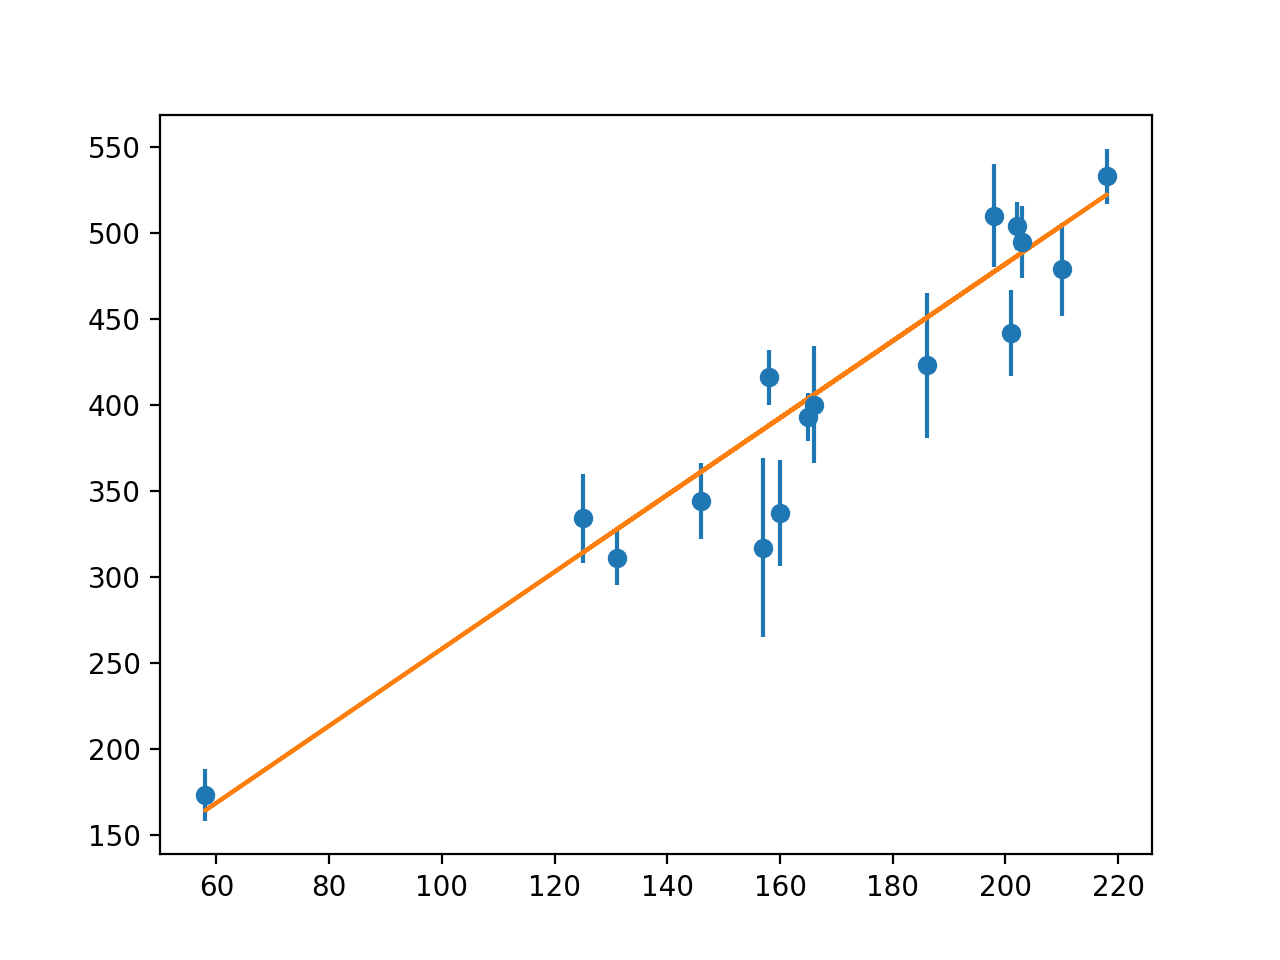

The best-fit value for the slope and intercept are: 2.2399 and 34.0477


In [64]:
# create the arrays
Y = y.transpose()
ones = np.ones((len(x),1))
A = np.column_stack((ones,x))
C = np.diag(sigma_y**2) # for matrix with no off diagonal terms

X = np.linalg.inv(A.transpose()@np.linalg.inv(C)@A) @ (A.transpose()@np.linalg.inv(C)@Y) # linalg? @= matrix multiplication
print(X) # this gives me the slope and y intercept

#best_fit = np.poly1d(X[::-1,0]) # ??? Something is FUCKED up here for me. This line doesn't work, so created a line instead 

plt.errorbar(x, y, yerr=sigma_y, fmt='o') 
plt.plot(x, x*X[1]+ X[0]) 

print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(X[1], X[0]))

**Problem 2f**

Confirm the results of this fit are the same as those from `np.polyfit`.

*Hint - be sure to include the uncertainties.*

In [67]:
p = np.polyfit(x, y, 1, w = 1/sigma_y) # w: weight is for the unceratinties
print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(p[0], p[1]))

The best-fit value for the slope and intercept are: 2.2399 and 34.0477


## Problem 3) Are the Uncertainties Actually Gaussian?

Previously we noted that there are two essential assumptions that are required for least-squares fitting to be correct. We are now going to examine the latter requirement, namely, that the uncertainties can be perfectly described as Gaussians with known variance.

Earlier I stated this assumption is rarely satisfied. Why might this be the case? 

In my experience (meaning this is hardly universal), if it's astro, it's got systematics. While I cannot prove this, I contend that systematic uncertainties are rarely Gaussian. If you are lucky enough to be in a regime where you can be confident that the systematics are Gaussian, I further contend that it is extremely difficult to be certain that the variance of that Gaussian is known.

Then there's another (astro-specific) challenge: in many circumstances, we aren't actually working with data, but rather with the results of other models applied to the data.

Let's take an optical astronomy (biased, but this is LSST after all) example. What are the data? In many cases inference is being based on measurements of brightness, but the true data in this case is simply a bunch of electron counts in a CCD. The brightness (or mag) is based on the application of a model (e.g., PSF, aperture, Kron) that is applied to the data. Thus, to assume that a flux (or mag) measurement has Gaussian uncertainties with known variance is to assume that whatever flux-measurement model has been applied always produces perfectly Gaussian uncertainties (and a lot of different assumptions go into flux-measurement models...)

As a demonstration associated with the challenges of these assumptions, we will examine the data set presented in Hogg, Bovy, & Lang. 

In [71]:
x = np.array([201, 201, 287, 166,  58, 157, 146, 218, 203, 186, 160,  47, 210,
       131, 202, 125, 158, 198, 165, 244])
y = np.array([592, 442, 402, 400, 173, 317, 344, 533, 495, 423, 337, 583, 479,
       311, 504, 334, 416, 510, 393, 401])
sigma_y = np.array([61, 25, 15, 34, 15, 52, 22, 16, 21, 42, 31, 38, 27, 16, 14, 26, 16,
       30, 14, 25])

**Problem 3a**

Using the least-squares methodology developed in Problem 2, determine the best-fit slope and intercept for a line fit to the data above. 

Make a scatter plot of the data, and overplot the best-fit line. What if anything, do you notice about the data and the fit?

<IPython.core.display.Javascript object>


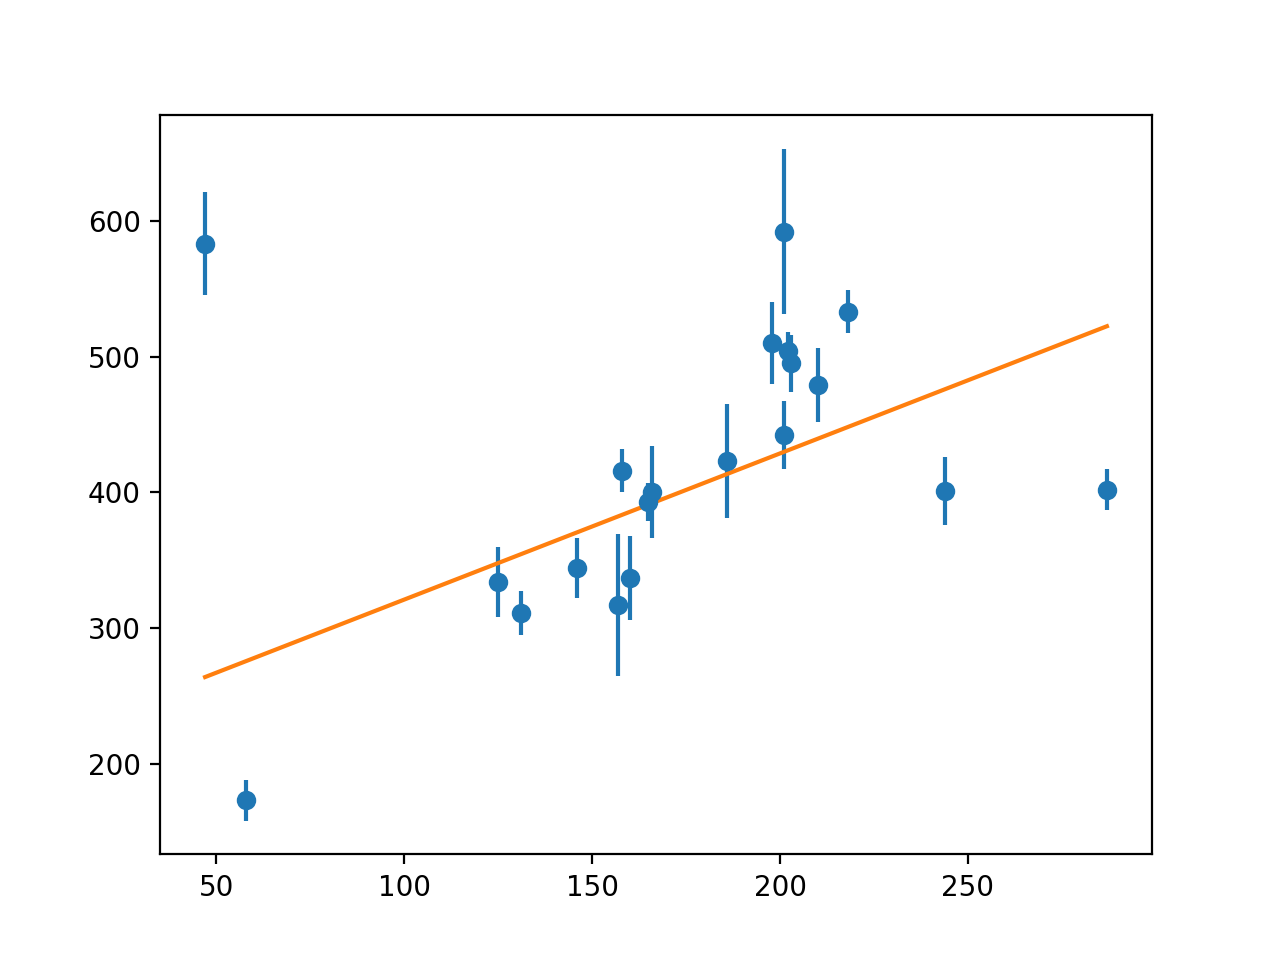

The best-fit value for the slope and intercept are: 1.0767 and 213.2735


In [83]:
Y = y.transpose()
ones = np.ones((len(x),1))
A = np.column_stack((ones,x))
C = np.diag(sigma_y**2) # for matrix with no off diagonal terms

X = np.linalg.inv(A.transpose()@np.linalg.inv(C)@A) @ (A.transpose()@np.linalg.inv(C)@Y) # linalg? @= matrix multiplication
xnew = np.linspace(x.min(), x.max(), 1000) # create array to evaluate

plt.errorbar(x, y, yerr=sigma_y, fmt='o')
plt.plot(xnew, xnew*X[1]+ X[0]) 

print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(X[1], X[0]))

Unlike the data in Problems 1 and 2, there appear to be some significant outliers (of course - this appearance of outliers is entirely dependent upon the assumption of linearity, there may actually be no outliers and a complex relation between `x` and `y`). As such, it does not appear (to me) as though the best-fit line provides a good model for the data.

**Problem 3b**

Perform a least-squares 2nd order polynomial fit to the data. Overplot the bestfit curve.

How does this compare to the linear model fit?

[  1.88458350e+01   3.71596602e+00  -7.80681914e-03]


<IPython.core.display.Javascript object>


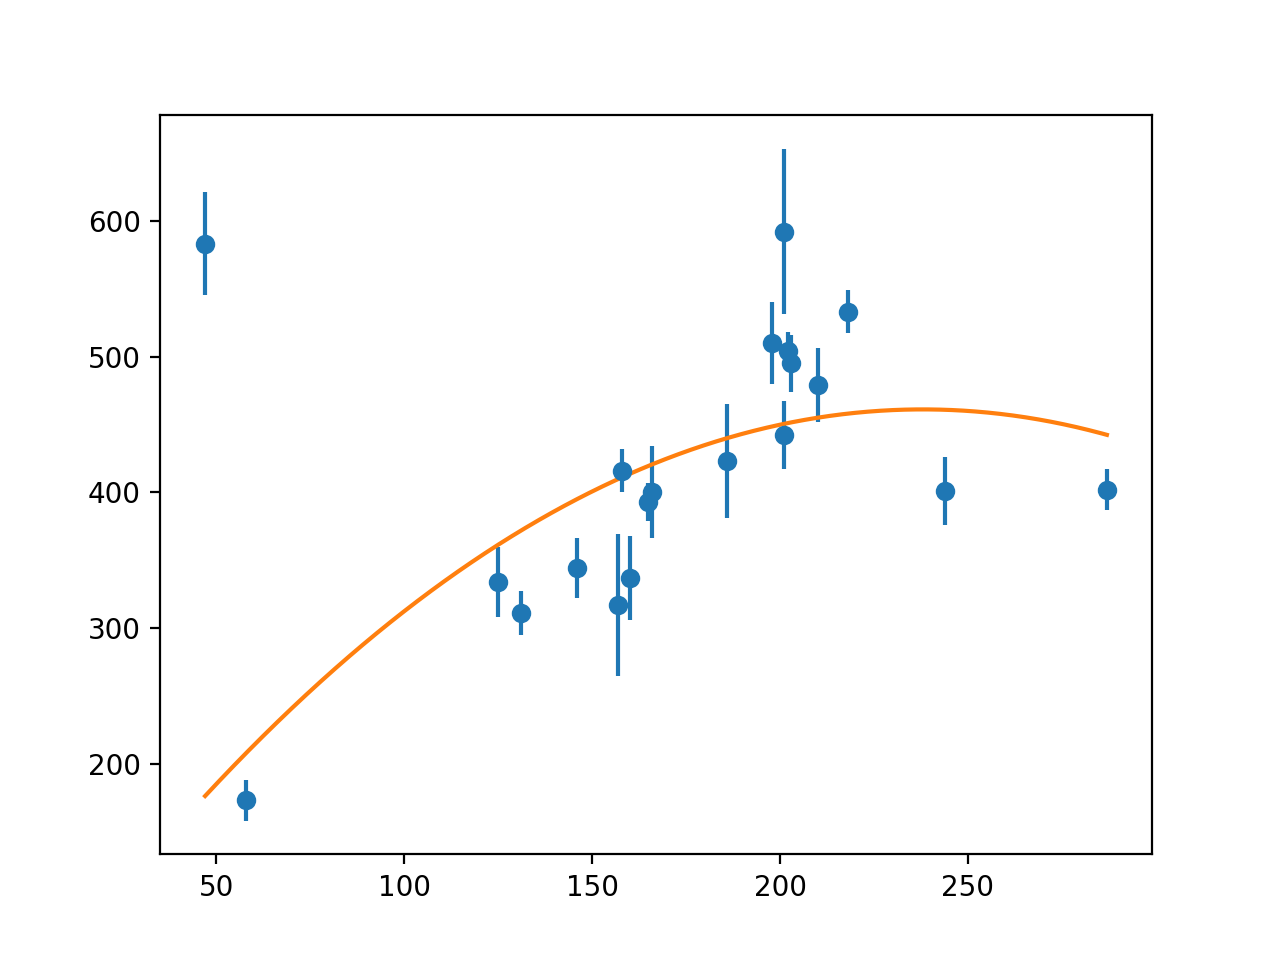

In [84]:
Y = y.transpose()
ones = np.ones((len(x),1))
A = np.column_stack((ones, x, x**2))
C = np.diag(sigma_y**2) # for matrix with no off diagonal terms

X = np.linalg.inv(A.transpose()@np.linalg.inv(C)@A) @ (A.transpose()@np.linalg.inv(C)@Y) # linalg? @= matrix multiplication
print(X)
xnew = np.linspace(x.min(), x.max(), 1000) # create array to evaluate

plt.errorbar(x, y, yerr=sigma_y, fmt='o')
plt.plot(xnew, xnew**2*X[2]+ xnew*X[1]+ X[0]) 

By eye (a metric that is hardly quantitative, but nevertheless worth developing because talks never provide all of the details), the quadratic fit appears "better" than the linear fit.

But, there are still "outliers" and in the realm of polynomial fitting, it is always possible to get a better fit by adding more degrees to the polynomial. Should we keep going here, or should we stop? (Again - we will discuss model selection with Adam on Friday)

[As a reminder - in machine learning we'd call this low training error, but the generalization error is likely huge]

How should we deal with these potential outliers?

(and to re-iterate, we cannot be certain that these points are, in fact, outliers)

Amazingly, if you scroll through the literature you can find solutions like the following: "We do not *believe* the data point at (x, y) for reasons A, B, C. Thus, we exclude that point from the fit."

This, obviously, lacks any sort of rigor. If data is going to be removed, and it is worth asking if data should ever be removed, it should not be subject to the "beliefs" of an individual person or group. 

A more common approach that you might encounter is known as $k\sigma$ clipping, which is an iterative procedure to identify and remove outliers from a data set. The procedure is as follows:

1. Fit the model to the data
2. Identify any data points that are $k\sigma$ discrepant from the best-fit model
3. Remove the discrepant points, repeat steps 1 & 2 until there are no data beyond $k\sigma$

The motivation for this procedure is the following: in a small data set (such as the one above, 20 points), the likelihood of having large $\sigma$ deviations (let's say $k = 5$) is vanishingly small. Thus, it "makes sense" to remove those points. 

Of course, this only makes sense if the uncertainties are truly gaussian with low variance. So again, specific, and likely untrue, assumptions have to be made. 

**Problem 3c**

Develop a $k\sigma$ clipping procedure to fit a line to the data set. Set $k = 5$ and determine the best-fit line to the data. 

Overplot the results of the procedure on the data. How does this fit to the data look?

In [92]:
from astropy.stats import sigma_clip
filtered_data = sigma_clip((x,y), sigma=5)
print(filtered_data)
good_data = filtered_data.data[~filtered_data.mask] # this shoved x and y together
print(good_data)
print(len(x))
print(len(good_data))
# plt.scatter(filtered_data)

[[201 201 287 166 58 157 146 218 203 186 160 47 210 131 202 125 158 198 165
  244]
 [592 442 402 400 173 317 344 533 495 423 337 583 479 311 504 334 416 510
  393 401]]
[201 201 287 166  58 157 146 218 203 186 160  47 210 131 202 125 158 198
 165 244 592 442 402 400 173 317 344 533 495 423 337 583 479 311 504 334
 416 510 393 401]
20
40


By eye, the results above are not that satisfying. Several of those points do look like outliers, but there are also 2 points being rejected that are well within the other cluster of data.

Furthermore, the point at $(x, y) \approx (60, 170)$ was clipped in an early iteration of the algorithm, but now with the final model this point is actually within $k\sigma$ of the best-fit line. What should one do with points like this?

This is one of the great problems with $k\sigma$ clipping: how does one select the appropriate value for $k$?

Even if there was a good heuristic argument for selecting $k$, is there fundamentally any difference between an observation that is $k\sigma + \epsilon$ away from the model versus a point at $k\sigma - \epsilon$, where $\epsilon \ll 1$? Any choice of $k$ will automatically remove one of these points and not the other, which seems somewhat arbitrary...

**Problem 3d**

Perform the $k\sigma$ procedure on the data, but this time set $k = 7$. Plot the results as above.

How do these results compare to our previous fits?

In [ ]:
# complete

By eye, this *appears* superior to the previous fit. At the same time, we have not actually optimized anything to definitively show that this is the case.

If there are outliers in the data, then it stands to reason that the uncertainties are likely not correctly estimated.

**Problem 3e**

Perform the $k\sigma$ procedure on the data, with $k = 5$, but the variance increased by a factor 4 (i.e. `sigma_y` increased by a factor of 2). Plot the results as above.

How do these results compare to our previous fits?

In [ ]:
# complete

If the uncertainties were underestimated then none of the data get clipped from the fit!

I assume (and I hope I've convinced you that assumptions are dangerous) that if you have worked with astronomical data that at one point or another you have (i) encountered data that appear to have outliers, and/or (ii) plotted data in 2 dimensions and then performed a (least-squares) linear fit to that data.

If that is true, I sincerely hope you have the following two thoughts:

1. Crap, crap, crap - I really messed up my paper on [*REDACTED*].
2. There has to be a better way!

First, let's address point 1. Don't freak out. Yes, it is probably the case that some work somewhere was not completed in the absolute most rigorous fashion possible. This is okay (and I feel fairly confident saying everyone has done it. There are definitely examples of each of the "bad" things described above in *my* papers if you go back and look hard enough.)

There are even some situations where the above prescriptions are appropriate and preferred (think engineering solutions as opposed to strict scientific inference). 

More importantly - point 2: there is a better way. Especially for the data/problem that we have been investigating above.

In particular, we can take a Bayesian approach to the problem (see Mario's lecture this afternoon), whereby we define a generative model (see Adam's lecture on Tuesday) that allows us to compute the likelihood of the observations (see Zeljko's lecture this afternoon). The computation of the likelihood or posterior probability distribution requires complex integrals, but this is possible using sophisticated sampling techniques (see Andy's talk on Tuesday).

The combination of each of these tools provides a far more satisfying result than the various procedures previously discussed in this lecture. 

## Challenge Problem

Use the procedure described above to determine the best-fit values for the slope and intercept of a line fit to the data.